<a href="https://colab.research.google.com/github/akanksha0911/Clustering-Techniques/blob/main/Clustering_Diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**




In [ ]:
# Importing Libs

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from matplotlib import pyplot as plt
%matplotlib inline


**Uploading the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle_data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Visualization


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



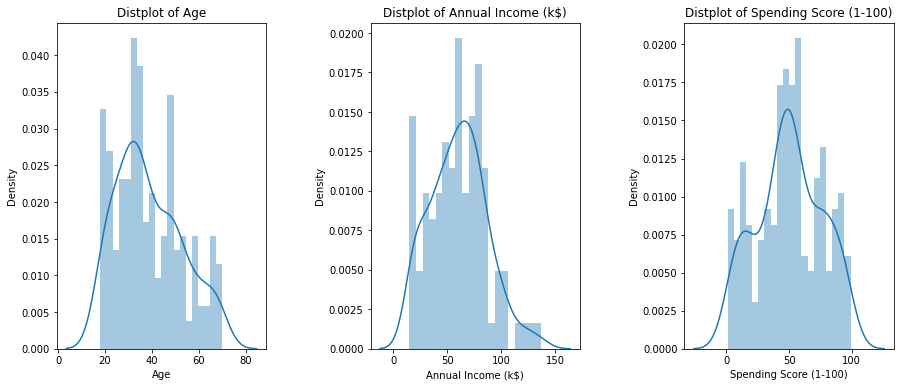

In [ ]:
# Histograms

# plt.style.use('fivethirtyeight')

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

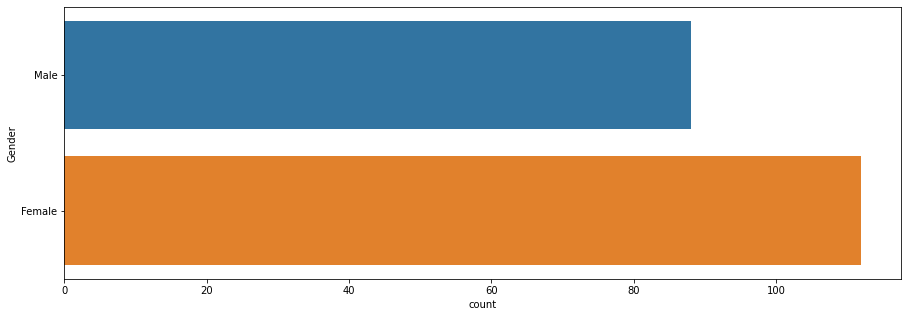

In [ ]:
# Count Plot of Gender

plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

## **K-Means clustering**


Using Elbow Method to find Optimal value of K (number of clusters).
Here, WCSS stands for Within-Cluster Sum of Square

In [ ]:


wcss = [] #empty array
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df[['Age','Annual Income (k$)']])
    wcss.append(kmeans.inertia_)


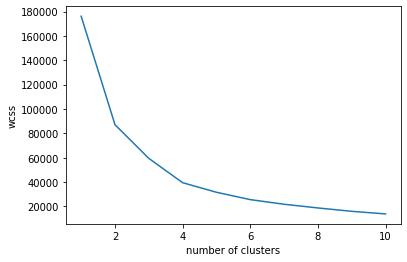

In [ ]:
#plotting graph
plt.plot(range(1,11), wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

The bend (or elbow) here at K=5 indicates the optimal number of cluster

In [ ]:
# Preprocessing using min max scaler

scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,39
1,2,Male,0.057692,0.000000,81
2,3,Female,0.038462,0.008197,6
3,4,Female,0.096154,0.008197,77
4,5,Female,0.250000,0.016393,40


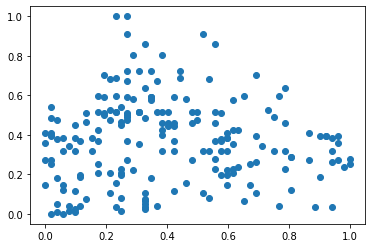

In [ ]:
plt.scatter(df.Age,df['Annual Income (k$)'])

In [ ]:
kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(df[['Age','Annual Income (k$)']])
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       4, 1, 2, 1, 4, 1, 1, 1, 2, 1, 2, 1, 4, 1, 4, 1, 1, 1, 2, 1, 4, 1,
       4, 1, 4, 1, 1, 1, 4, 1, 1, 2, 4, 4, 4, 2, 1, 2, 2, 3, 2, 2, 2, 3,
       4, 2, 3, 1, 2, 4, 2, 2, 2, 3, 4, 4, 3, 4, 2, 4, 2, 4, 3, 4, 2, 3,
       3, 4, 2, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 2, 3, 4, 3, 2, 4, 2, 2,
       2, 3, 4, 3, 3, 3, 2, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4,
       3, 3, 3, 3, 4, 3, 3, 0, 2, 3, 3, 3, 3, 3, 4, 3, 0, 0, 4, 0, 4, 0,
       4, 3, 0, 3, 0, 3, 2, 3, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
df['cluster']=y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,39,1
1,2,Male,0.057692,0.000000,81,1
2,3,Female,0.038462,0.008197,6,1
3,4,Female,0.096154,0.008197,77,1
4,5,Female,0.250000,0.016393,40,1


In [ ]:
kmeans.cluster_centers_

array([[0.34319527, 0.67087011],
       [0.18885602, 0.10844893],
       [0.83846154, 0.29648712],
       [0.13414634, 0.42602959],
       [0.534699  , 0.35762651]])

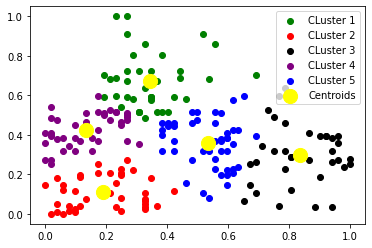

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green', label = 'CLuster 1')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red', label = 'CLuster 2')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black', label = 'CLuster 3')
plt.scatter(df4.Age,df4['Annual Income (k$)'],color='purple', label = 'CLuster 4')
plt.scatter(df5.Age,df5['Annual Income (k$)'],color='blue', label = 'CLuster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200, c = 'yellow', label = 'Centroids')
plt.legend()

**Agglomerative Hierarchical Clustering. Agglomerative is the bottom up approach which is more popular than Divisive clustering. ****
**

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average').fit(df[['Age','Annual Income (k$)']])
agglom

AgglomerativeClustering(linkage='average', n_clusters=5)

In [ ]:
df['Labels'] = agglom.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Labels
0,1,Male,0.019231,0.000000,39,1,0
1,2,Male,0.057692,0.000000,81,1,0
2,3,Female,0.038462,0.008197,6,1,0
3,4,Female,0.096154,0.008197,77,1,0
4,5,Female,0.250000,0.016393,40,1,0


[0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 3 0 2 2 3 2 2 0 2 2 0 3 2 2 0 2 3 3 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 3 0 0 0 2 2 2 2 0 3 3 3 0 3 3 3 4 3 3 3 0 3 0 3 3 3 0 3 4 3 3 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 3 0 3 4 3 3 3 3 3 3 3 3 3 4 3 4 3 4 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 1 3 1 1 1 1]
AgglomerativeClustering(linkage='average', n_clusters=5)


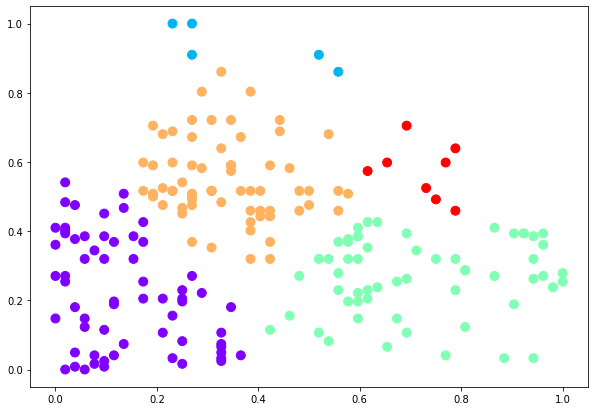

In [ ]:
print(agglom.fit_predict(df[['Age','Annual Income (k$)']]))
print(agglom.fit(df[['Age','Annual Income (k$)']]))
plt.figure(figsize=(10, 7))  
plt.scatter(df.Age, df['Annual Income (k$)'], c=agglom.labels_, s= 80, cmap='rainbow')  
plt.show() 

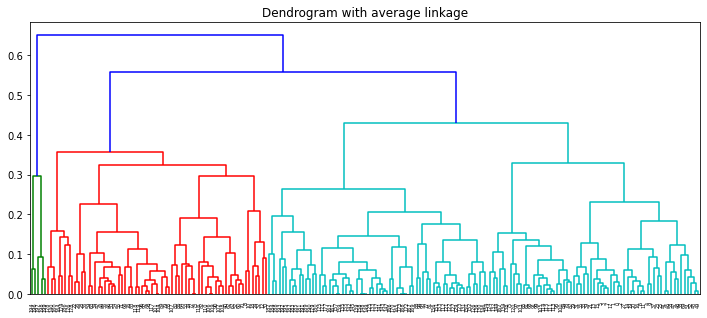

In [ ]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with average linkage")  
dend = shc.dendrogram(shc.linkage((df[['Age','Annual Income (k$)']]), method='average'))

In [ ]:
from scipy.spatial.distance import squareform, pdist
dist = pd.DataFrame(squareform(pdist(df[['Age','Annual Income (k$)']]), 'euclidean'))
dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.038462,0.020905,0.077359,0.231351,0.059976,0.308673,0.080758,0.866005,0.214064,0.923659,0.309434,0.751119,0.104524,0.348572,0.070768,0.311598,0.052807,0.637994,0.314602,0.316412,0.136951,0.525661,0.244894,0.681459,0.219856,0.511228,0.325621,0.419834,0.138151,0.797990,0.128826,0.670286,0.148789,0.595490,0.152472,0.468925,0.262684,0.373359,0.181350,...,0.884015,0.558728,0.540984,0.588148,0.827413,0.660372,0.730973,0.641226,0.674664,0.640932,0.715112,0.615020,0.674664,0.674664,0.872223,0.634653,0.959445,0.617822,1.000239,0.709532,0.756031,0.717119,0.855831,0.706985,0.808121,0.720288,0.974650,0.725855,0.836232,0.791940,0.776853,0.763407,0.847196,0.882475,1.015219,0.914004,1.038172,0.943558,1.030776,1.022129
1,0.038462,0.000000,0.020905,0.039325,0.193005,0.025270,0.270351,0.045650,0.827573,0.176155,0.885223,0.271220,0.712718,0.070768,0.310410,0.045271,0.273686,0.052807,0.599749,0.277101,0.279155,0.106580,0.487707,0.209048,0.643499,0.187145,0.473679,0.289551,0.382981,0.121028,0.760011,0.122951,0.632824,0.158420,0.558309,0.147541,0.432835,0.232830,0.340188,0.181350,...,0.853362,0.546684,0.542349,0.574148,0.800146,0.642201,0.708363,0.626051,0.656889,0.626931,0.694118,0.605322,0.656889,0.656889,0.844651,0.622889,0.929689,0.609384,0.970971,0.693719,0.739212,0.704634,0.833058,0.697506,0.788667,0.709945,0.948497,0.717656,0.817447,0.776853,0.763407,0.751691,0.835770,0.867257,0.995353,0.901784,1.020206,0.934104,1.022129,1.014867
2,0.020905,0.020905,0.000000,0.057692,0.211697,0.039325,0.288927,0.059976,0.846511,0.193873,0.904181,0.289508,0.731504,0.083619,0.328563,0.050540,0.291358,0.040984,0.618054,0.294113,0.295821,0.116385,0.505413,0.224033,0.661203,0.199074,0.490728,0.304770,0.399103,0.121173,0.777743,0.116354,0.649733,0.144555,0.574837,0.140665,0.448065,0.242385,0.352567,0.172131,...,0.863685,0.544626,0.533134,0.573245,0.807907,0.643854,0.712886,0.625869,0.658301,0.626051,0.697578,0.601959,0.658301,0.658301,0.852638,0.620706,0.939317,0.605322,0.980228,0.693943,0.740059,0.702896,0.837711,0.694058,0.791162,0.706985,0.955477,0.713505,0.819527,0.776664,0.762245,0.749525,0.833460,0.867167,0.998142,0.899942,1.021808,0.930703,1.018297,1.010275
3,0.077359,0.039325,0.057692,0.000000,0.154064,0.020905,0.231351,0.016393,0.788845,0.136843,0.846511,0.232076,0.673875,0.038011,0.271220,0.038011,0.234380,0.070768,0.560636,0.237795,0.239905,0.076021,0.448417,0.170619,0.604214,0.151619,0.434360,0.250857,0.343851,0.106557,0.720733,0.121028,0.593512,0.169300,0.519054,0.144555,0.394049,0.199724,0.303528,0.181542,...,0.818168,0.529127,0.538311,0.554554,0.767772,0.618364,0.680234,0.605140,0.633392,0.607159,0.667506,0.589857,0.633392,0.633392,0.811982,0.605322,0.895168,0.595156,0.936823,0.672013,0.716445,0.686123,0.804609,0.681963,0.763327,0.693518,0.916962,0.703325,0.792689,0.755667,0.743829,0.733818,0.818008,0.845793,0.969383,0.883143,0.995966,0.918101,1.006792,1.000897
4,0.231351,0.193005,0.211697,0.154064,0.000000,0.173077,0.077359,0.154064,0.634827,0.025270,0.692502,0.078651,0.519813,0.136843,0.117976,0.174815,0.083619,0.214064,0.406830,0.091301,0.095965,0.128863,0.295821,0.065574,0.451404,0.098025,0.283927,0.118519,0.199074,0.182602,0.567781,0.219856,0.442938,0.282311,0.370165,0.232770,0.253309,0.140665,0.190053,0.267625,...,0.699573,0.509650,0.573105,0.524590,0.666465,0.565610,0.603840,0.566880,0.581772,0.574093,0.599306,0.576664,0.581772,0.581772,0.708363,0.582285,0.779927,0.587029,0.823413,0.627682,0.665812,0.656020,0.723892,0.665048,0.699101,0.672406,0.818353,0.690937,0.730679,0.711446,0.707275,0.705180,0.787825,0.798317,0.898584,0.847759,0.933126,0.893650,0.983795,0.983795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

***DB Scan clustering ***

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.



It works based on two parameters: Epsilon and Minimum Points
Epsilon determine a specified radius that if includes enough number of points within, we call it dense area.    

minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



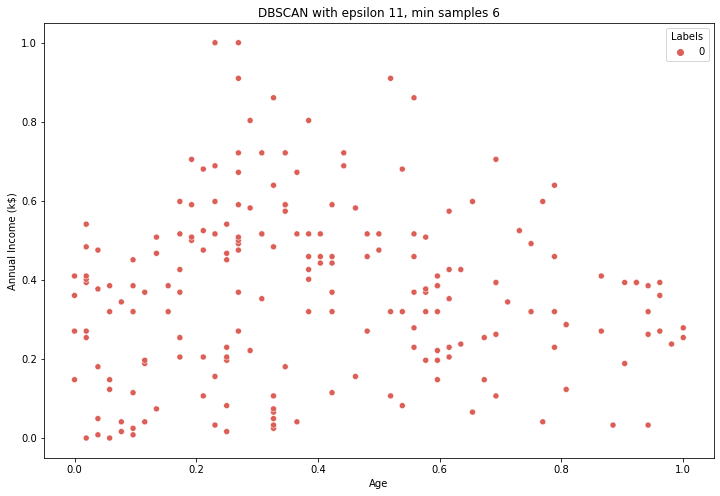

In [ ]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=9, min_samples=10).fit(df[['Age','Annual Income (k$)']])

df['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df.Age, df['Annual Income (k$)'], hue=df['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

In [102]:
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)


In [103]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [104]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [105]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


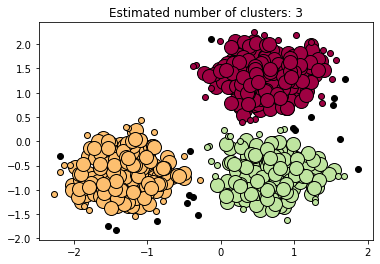

In [106]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

**Gaussian mixture models clustering**

 a Gaussian mixture model is very similar to k-means: it uses an expectation–maximization approach which qualitatively does the following:

Choose starting guesses for the location and shape

Repeat until converged:

E-step: for each point, find weights encoding the probability of membership in each cluster
M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights
The result of this is that each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model. Just as in the k-means expectation–maximization approach, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

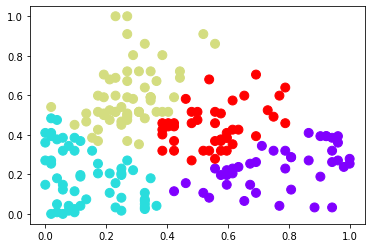

In [ ]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=4).fit(df[['Age','Annual Income (k$)']])
labels = gmm.predict(df[['Age','Annual Income (k$)']])
plt.scatter(df.Age, df['Annual Income (k$)'], c=labels, s= 80, cmap='rainbow')  

In [ ]:
probs = gmm.predict_proba(df[['Age','Annual Income (k$)']])
print(probs[:5].round(3))

[[0.    0.983 0.016 0.   ]
 [0.    0.987 0.013 0.   ]
 [0.    0.984 0.015 0.   ]
 [0.001 0.989 0.011 0.   ]
 [0.009 0.985 0.004 0.003]]


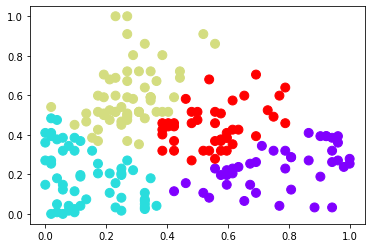

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(df.Age, df['Annual Income (k$)'], c=labels, s= 80, cmap='rainbow')  
